In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x1 = np.random.randint(low=0, high=100, size= 200)
x2 = np.random.randint(low=0, high=100, size= 200)
data = {'x1':x1, 'x2':x2, 'y':0}

df_red = pd.DataFrame.from_dict(data)
df_red.head()

,x1,x2,y
0,55,87,0
1,80,91,0
2,41,68,0
3,55,64,0
4,55,49,0


In [16]:
idx = df_red[(df_red.x1 < 50) & (df_red.x2> 20) & (df_red.x2 < 30)].index
idx

Int64Index([13, 29, 30, 38, 57, 59, 103, 105, 127, 129, 151, 166], dtype='int64')

In [17]:
df_red.drop(index =idx, inplace=True)

In [18]:
df_red = df_red.sample(100)

In [19]:
x1 = np.random.randint(low=0, high=50, size= 100)
x2 = np.random.randint(low=20, high=30, size= 100)
data = {'x1':x1, 'x2':x2, 'y':1}

df_blue = pd.DataFrame.from_dict(data)
df_blue.head()

,x1,x2,y
0,27,23,1
1,23,24,1
2,23,27,1
3,10,21,1
4,12,22,1


In [20]:
data = pd.concat([df_red, df_blue], axis=0)
data.head()

,x1,x2,y
156,16,73,0
163,92,55,0
115,9,36,0
143,64,30,0
170,27,80,0


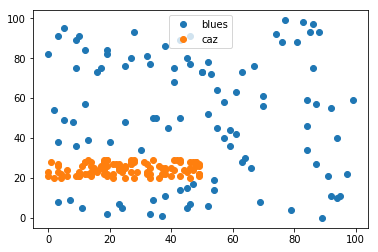

In [21]:
plt.plot(data[data.y==0].x1, data[data.y==0].x2, 'o', label = "blues")
plt.plot(data[data.y==1].x1, data[data.y==1].x2, 'o', label = "caz")
plt.legend()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

NameError: name 'preprocessing' is not defined

In [23]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

In [13]:
plot_decision_regions(scaler.transform(X), y, classifier=model)

NameError: name 'scaler' is not defined

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))


1.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


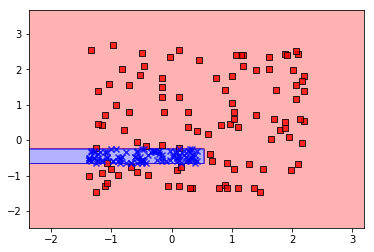

In [70]:
plot_decision_regions(scaler.transform(X), y, classifier=tree)

In [72]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 10), random_state=1)

X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33,stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.98


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


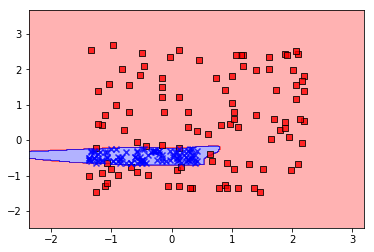

In [73]:
plot_decision_regions(scaler.transform(X), y, classifier=clf)

In [81]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
importances

array([0.28880734, 0.71119266])

In [85]:
indices = np.argsort(importances)[::-1]
indices

array([1, 0])

In [88]:
data.columns[:-1][indices]

Index(['x2', 'x1'], dtype='object')

Text(0,0.5,'x2')

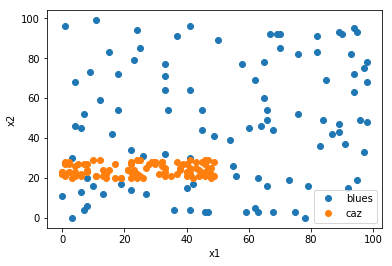

In [89]:
plt.plot(data[data.y==0].x1, data[data.y==0].x2, 'o', label = "blues")
plt.plot(data[data.y==1].x1, data[data.y==1].x2, 'o', label = "caz")
plt.legend();plt.xlabel('x1');plt.ylabel('x2')

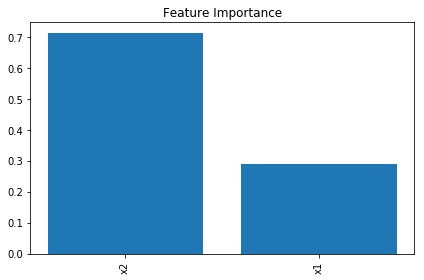

In [93]:
plt.bar(range(X_train.shape[1]),importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), data.columns[:-1][indices], rotation=90)
plt.title('Feature Importance');plt.tight_layout()